In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


loading The abalone Data set

In [3]:
# using label encoder 
from sklearn.preprocessing import LabelEncoder
lE = LabelEncoder()
df['Sex'] = lE.fit_transform(df['Sex'])
df['Sex'].unique()

array([2, 0, 1], dtype=int64)

from the above data i can see that 'sex' column we have tring values, so we should convert it into integers using label encoder because that column include class like- Male,Female,Infant

In [4]:
def ring_label(x):
    if x<=10:
        return 'young'
    if x<=20:
        return 'middle age'
    if x<=30:
        return 'old'

In [5]:
df['Rings'] = df['Rings'].apply(ring_label)

In [6]:
# using label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Rings'] = le.fit_transform(df['Rings'])
df['Rings'].unique()

array([0, 2, 1], dtype=int64)

In [7]:
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_mapping)

{'middle age': 0, 'old': 1, 'young': 2}


from the above data we can also see that 'Ring' column denotes age so we i tried to label it in class Young age,Middle age,Old age and also converted it into integer using label encoder.

In [8]:
# check the info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null int32
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int32
dtypes: float64(7), int32(2)
memory usage: 261.2 KB


checking the information of above data, it shows which columns having which types of values. like we have float type data and also integer type data

In [9]:
# check the description
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,1.315777
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.944394
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,2.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,2.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,2.000000


describe function will give us all the information of all statistical measures for the data  

In [10]:
# check null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Here i tried to check weather the data set is having any null values or not

In [11]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings            -0.665827
dtype: float64

Here i tried to find out is there any skewness in the data across the column

# Check the distribution of skewness

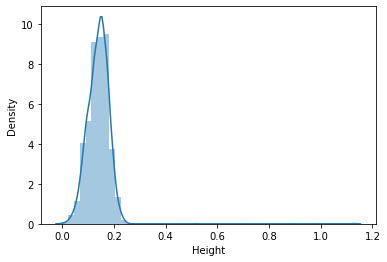

In [12]:
sns.distplot(df['Height'])

Here i tried to visualize the skewness and it seems like its normal distribution so we move ahead

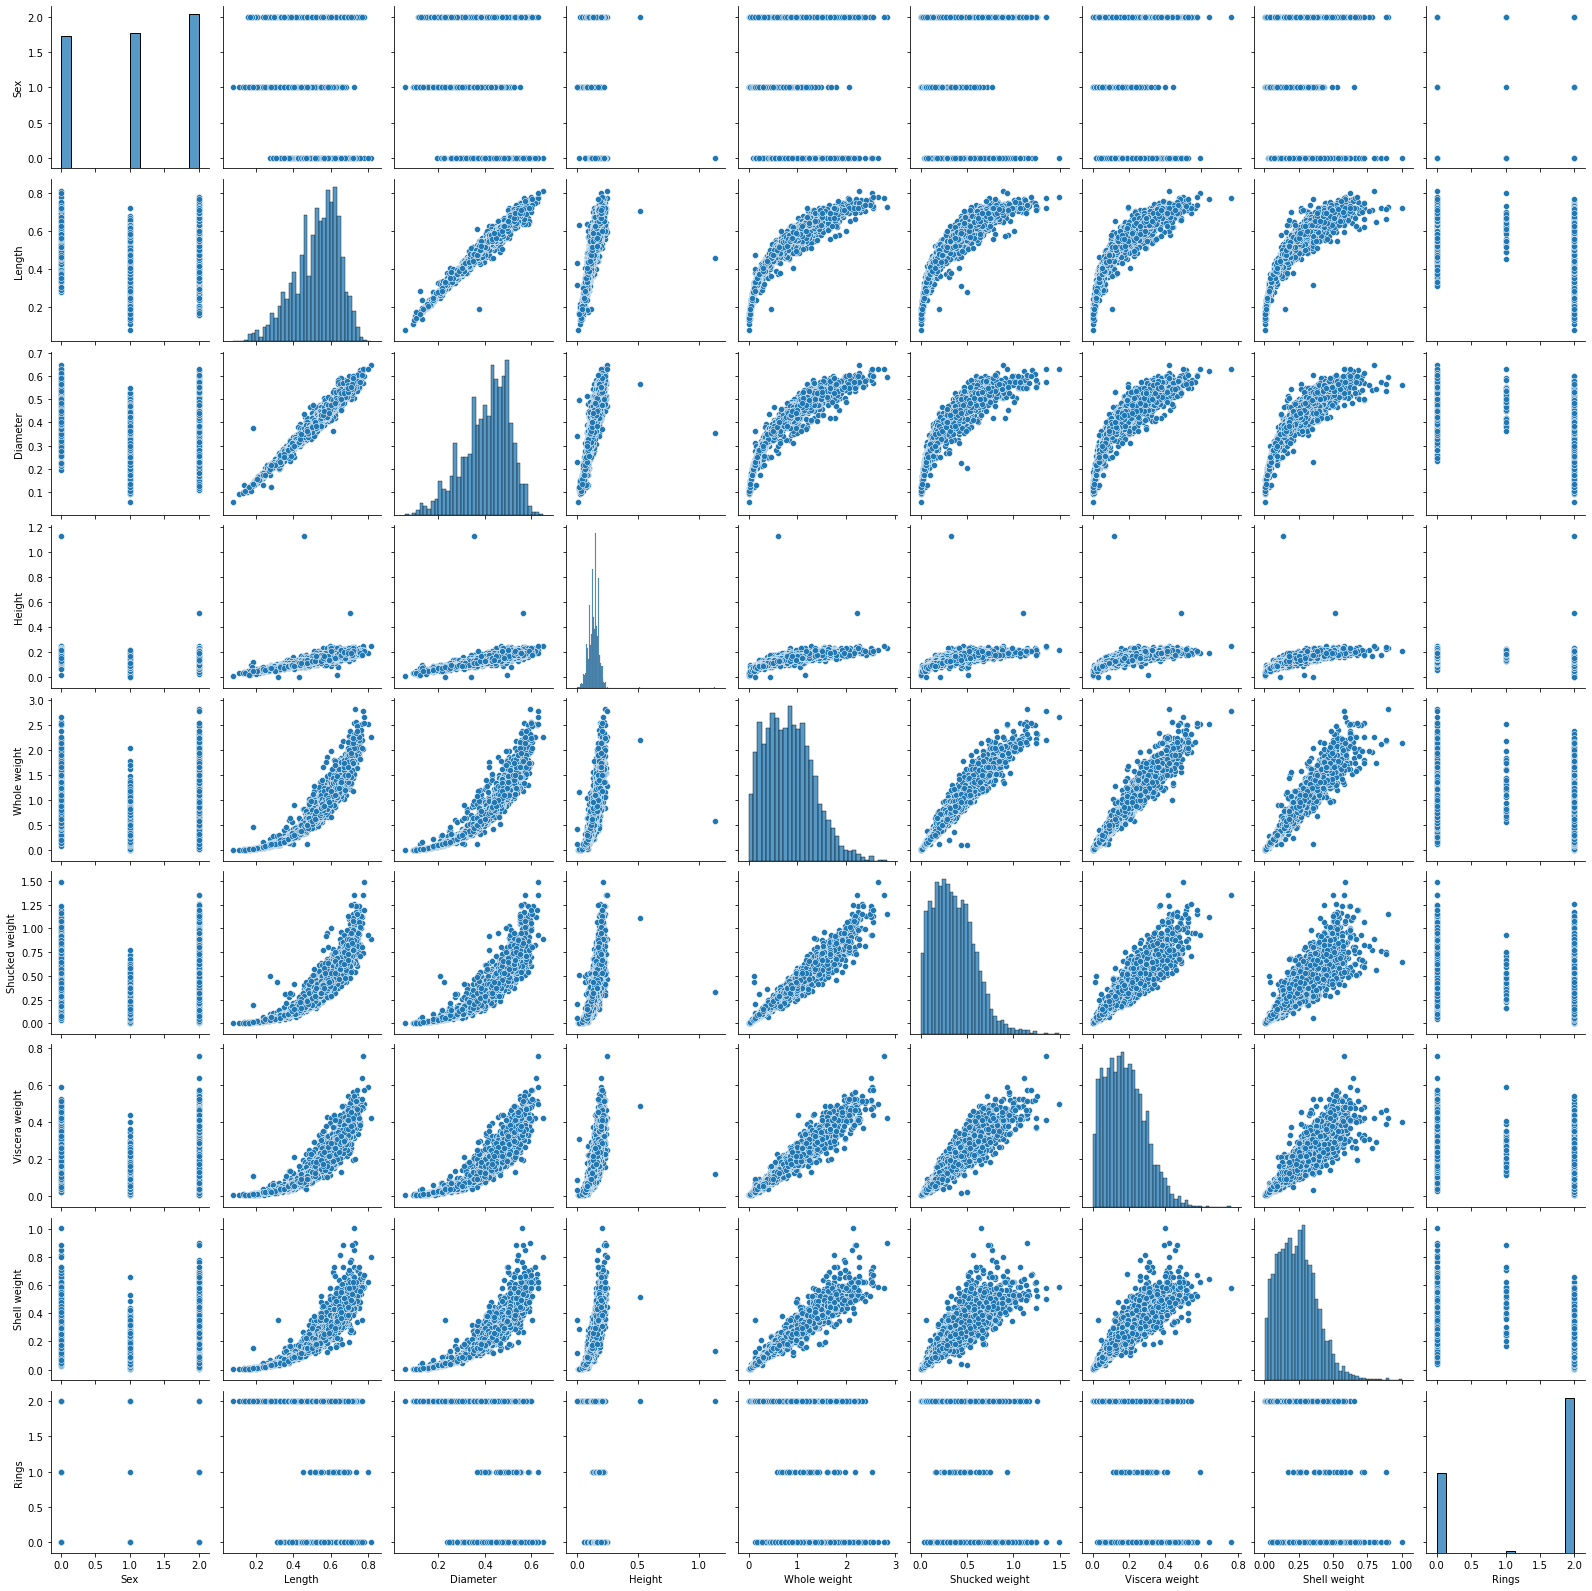

In [202]:
sns.pairplot(df)

Here i tried to visualize the relation between all the columns with respect to each other with pair plot

# Plotting outliers

In [13]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Sex                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
Length            AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Diameter           AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Height            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Whole weight      AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.133621x0.343182)
Viscera weight       AxesSubplot(0.285345,0.125;0.133621x0.343182)
Shell weight          AxesSubplot(0.44569,0.125;0.133621x0.343182)
Rings                AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

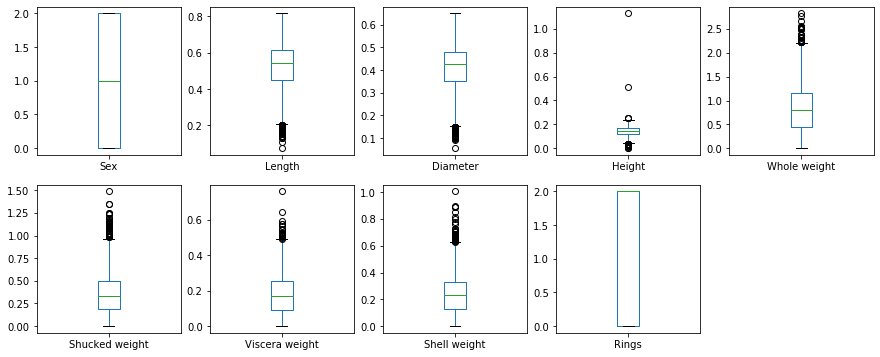

In [14]:
df.plot(kind = 'box',subplots = True,layout=(2,5),figsize = (15,6))

Here i tried to plot the outliers present in the dataset and it looks like the outliers does exist in the data set so we try to remove or minimise the outliers using zscore

In [15]:
# using z score
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.39341686],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.72459705],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.72459705],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.72459705],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.72459705],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        1.39341686]])

here i tried to find out the zscore 

In [16]:
threshold = 3
print(np.where(z>3))

(array([  81,  129,  163,  164,  165,  165,  165,  166,  168,  170,  236,
        236,  236,  237,  237,  238,  238,  239,  277,  334,  358,  358,
        526,  526,  694,  696,  696,  719,  719,  720,  720,  891,  891,
        891, 1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206,
       1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418,
       1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756,
       1757, 1759, 1761, 1762, 1762, 1762, 1763, 1763, 1763, 1821, 1982,
       1986, 1987, 1987, 2051, 2090, 2108, 2114, 2114, 2157, 2161, 2208,
       2274, 2334, 2334, 2368, 2381, 2544, 2623, 2624, 2624, 2624, 2625,
       2709, 2710, 2710, 2810, 2810, 2811, 2811, 2811, 2862, 2863, 2863,
       2863, 3007, 3008, 3148, 3149, 3151, 3188, 3427, 3427, 3427, 3599,
       3599, 3628, 3713, 3715, 3715, 3715, 3715, 3800, 3837, 3899, 3899,
       3902, 3961, 3962, 3996, 4145, 4148], dtype=int64), array([7, 7, 7, 7, 4, 5, 7, 7, 7, 6, 1, 2, 3, 1, 2, 1, 2, 1, 7, 7

here i tried to filter out the values which are greater than z score by giving threshold of 3

In [17]:
df_new = df[(z<3).all(axis = 1)]
print(df_new.shape)
print(df.shape)

(4084, 9)
(4177, 9)


now here i kept the values which are less than the threshold inside the dataframe

Sex                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
Length            AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Diameter           AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Height            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Whole weight      AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.133621x0.343182)
Viscera weight       AxesSubplot(0.285345,0.125;0.133621x0.343182)
Shell weight          AxesSubplot(0.44569,0.125;0.133621x0.343182)
Rings                AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

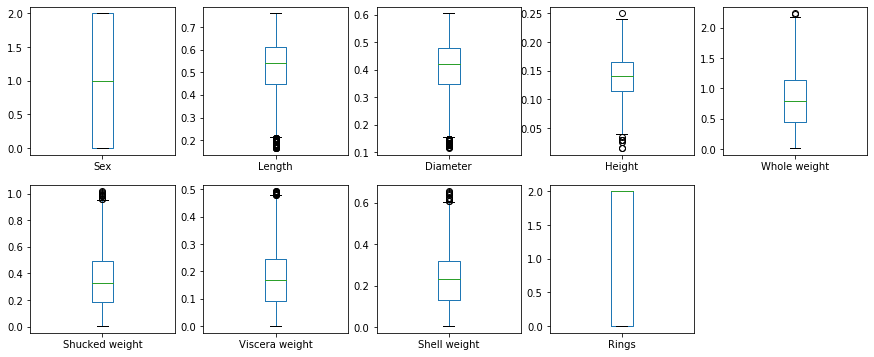

In [18]:
df_new.plot(kind = 'box',subplots = True,layout = (2,5),figsize = (15,6))

now we can look at the boxplot again and the outliers has reduced

In [19]:
# now split the data into feature and target variables
x = df.drop(columns = ['Rings'])
y = df['Rings']

now here i created x and y variables so that we could move forward towards deploying machine learning models

In [20]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [21]:
y

0       0
1       2
2       2
3       2
4       2
       ..
4172    0
4173    2
4174    2
4175    2
4176    0
Name: Rings, Length: 4177, dtype: int32

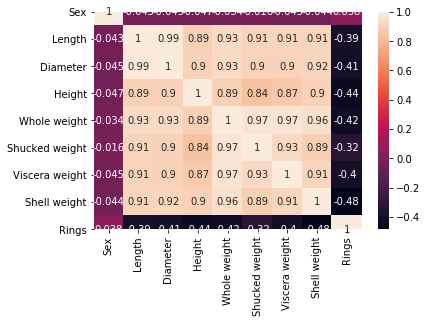

In [22]:
sns.heatmap(df_new.corr(),annot = True)

Here i used the heatmap to check the correlation between the columns visually

In [23]:
# using Vif to check the multicolinearity
def cal_vif(x):
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['Vif Factors'] = [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif
cal_vif(x)    

,Variables,Vif Factors
0,Sex,2.555356
1,Length,700.488988
2,Diameter,749.121626
3,Height,42.128924
4,Whole weight,421.652484
5,Shucked weight,101.674946
6,Viscera weight,63.585627
7,Shell weight,81.873737


vif shows the amount of correlation between the columns and here it seems like Diameter shucked weight, whole weight having high multicolinearity but we cant delete all the columns.

In [24]:
x = x.drop(columns = ['Diameter','Shucked weight'])
x

,Sex,Length,Height,Whole weight,Viscera weight,Shell weight
0,2,0.455,0.095,0.5140,0.1010,0.1500
1,2,0.350,0.090,0.2255,0.0485,0.0700
2,0,0.530,0.135,0.6770,0.1415,0.2100
3,2,0.440,0.125,0.5160,0.1140,0.1550
4,1,0.330,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.565,0.165,0.8870,0.2390,0.2490
4173,2,0.590,0.135,0.9660,0.2145,0.2605
4174,2,0.600,0.205,1.1760,0.2875,0.3080
4175,0,0.625,0.150,1.0945,0.2610,0.2960


Here i deleted the Diameter column so that i could reduce the multicolinearity

In [25]:
cal_vif(x) 

,Variables,Vif Factors
0,Sex,2.551992
1,Length,43.867298
2,Height,41.421697
3,Whole weight,123.943498
4,Viscera weight,59.320247
5,Shell weight,49.410007


here we can see that the amount of vif factors has reduced.

In [26]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

Now here i used standard scaler to standardise the columns 

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = .25,random_state = 0)

Here i split x and y into training set and testing set using train_test_split.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Now i imported all the necessary Machine learning liabraries  

In [33]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()

model = [lr,rfc,dt,nb]

for i in model:
    i.fit(x_train,y_train)
    print('Train Score',i.score(x_train,y_train))
    print('Test Score',i.score(x_test,y_test))
    pred = i.predict(x_test)
    print('Accuracy score of',i,'is',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Train Score 0.7442528735632183
Test Score 0.738755980861244
Accuracy score of LogisticRegression() is 0.738755980861244
[[176   0 195]
 [  7   0   0]
 [ 71   0 596]]
              precision    recall  f1-score   support

           0       0.69      0.47      0.56       371
           1       0.00      0.00      0.00         7
           2       0.75      0.89      0.82       667

    accuracy                           0.74      1045
   macro avg       0.48      0.46      0.46      1045
weighted avg       0.73      0.74      0.72      1045

Train Score 1.0
Test Score 0.7397129186602871
Accuracy score of RandomForestClassifier() is 0.7397129186602871
[[201   0 170]
 [  7   0   0]
 [ 95   0 572]]
              precision    recall  f1-score   support

           0       0.66      0.54      0.60       371
           1       0.00      0.00      0.00         7
           2       0.77      0.86      0.81       667

    accuracy                           0.74      1045
   macro avg       0.48 

And i used necessary machine learning models deploid the training set and testing set and checked the accuracy

In [47]:
from sklearn.model_selection import cross_val_score
for i in model:
    score = cross_val_score(i,x,y,cv =7)
    print('cv score of',i,'is',score.mean())

cv score of LogisticRegression() is 0.7368867347282916
cv score of RandomForestClassifier() is 0.7323454119430647
cv score of DecisionTreeClassifier() is 0.6655521133953565
cv score of GaussianNB() is 0.6727276523236186


i used cross_validation_score to check if there is any underfitting or overfitting . Looks like Logistic Regression model is giving the acurate score

# Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'tol':[1,0.1,0.01,0.001,0.0001],
              'max_iter':[10,20,30,40,50,60,70,80,90,100],
               'multi_class':['auto', 'ovr', 'multinomial']}
lr = LogisticRegression()
clf = GridSearchCV(estimator = lr,param_grid = parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'max_iter': 60,
 'multi_class': 'auto',
 'penalty': 'none',
 'solver': 'sag',
 'tol': 0.1}

Here i used hyperparameter tuning so that i could get the maximum accuracy

In [44]:
lr2 = LogisticRegression(max_iter= 60,
                         penalty = 'none',
                         tol = 0.1,
                         solver = 'sag',
                         multi_class = 'auto')
lr2.fit(x_train,y_train)
print(lr2.score(x_train,y_train))
print(lr2.score(x_test,y_test))

0.743933588761175
0.7368421052631579


Now Here i used the required parameter in logistic regression and tried to find out the scores

In [45]:
pred_final = lr2.predict(x_test)
print(accuracy_score(y_test,pred_final))

0.7368421052631579


now here is the final output after using hyperparameter tuning

In [48]:
compare = pd.DataFrame({'actual value':y_test,
                       'predicted value':pred_final})
compare.head(20)

,actual value,predicted value
668,0,0
1580,2,2
3784,0,2
463,2,2
2615,0,2
1399,0,0
2054,2,2
2058,2,2
217,2,2
1931,2,0


Here i tried to see the actual data and the predicted data

# Now we dump the final output

In [ ]:
import pickle
filename = 'abalone_age_predict-1.pkl'
pickle.dump(lr2,open(filename,'wb'))